In [ ]:
# %% Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# %% Parameters (customize these)
FILE1_PATH = "C3_liquid.csv"  # Update with first CSV path
FILE2_PATH = "C3_gas.csv"  # Update with second CSV path
START_DATETIME = "2025-07-26 11:00"  # Start date/time (YYYY-MM-DD HH:MM)
END_DATETIME = "2025-07-30 23:00"    # End date/time (YYYY-MM-DD HH:MM)



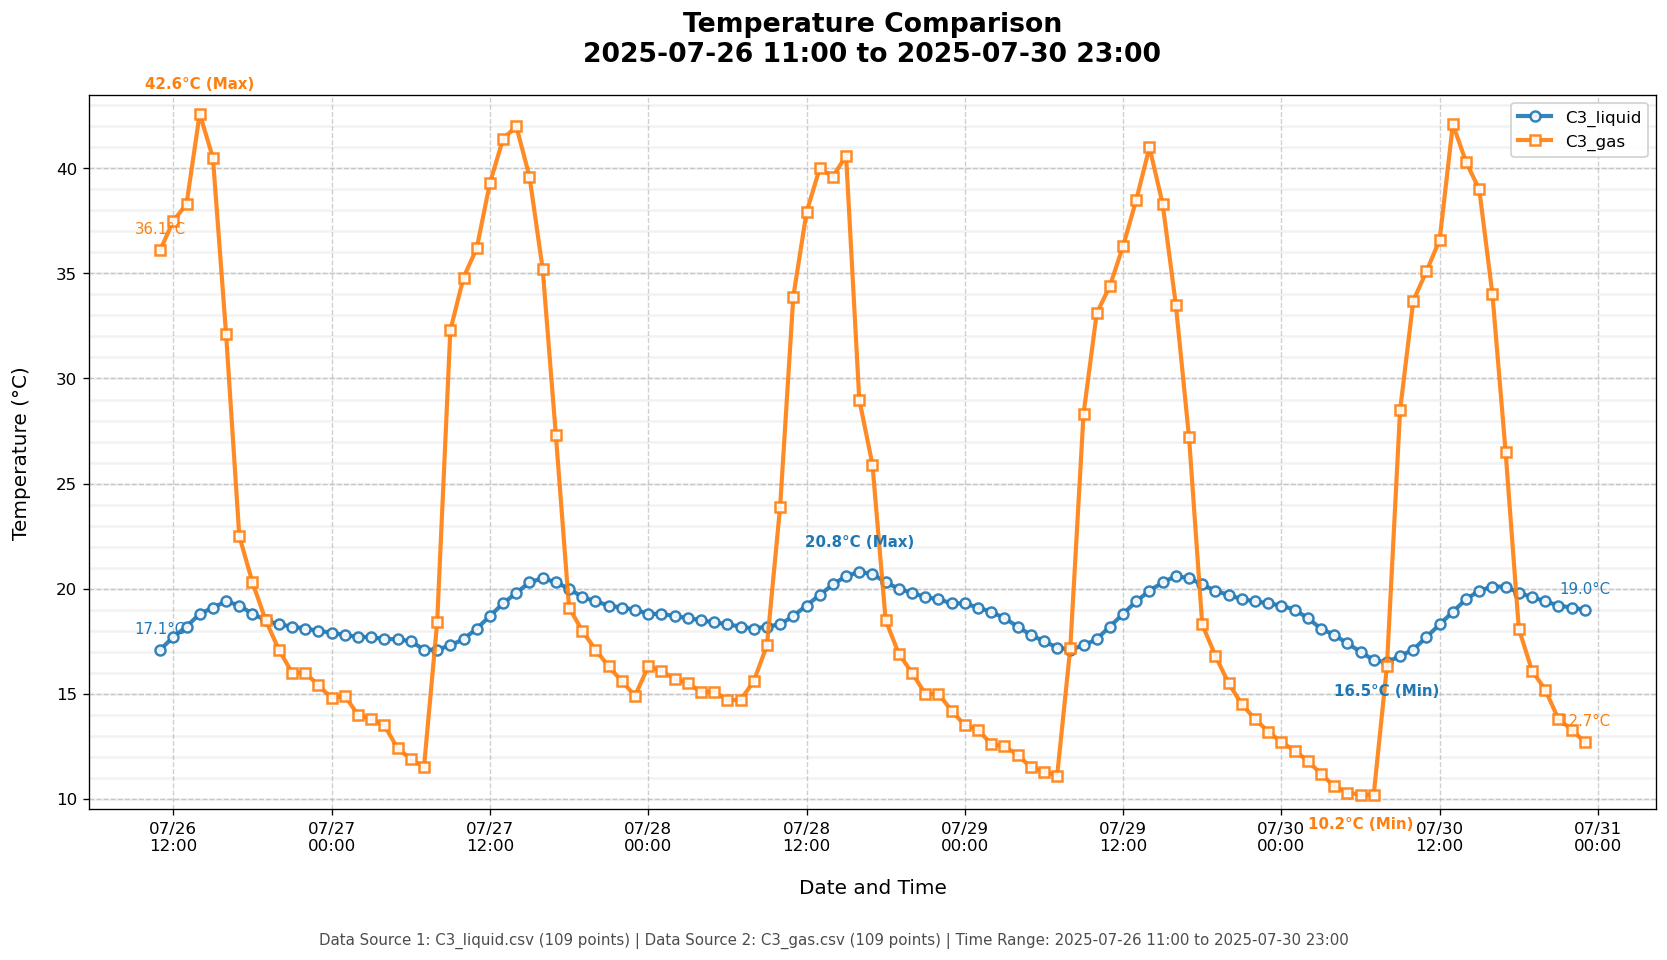


Sample of Dataset 1:
                       date_str time_str  temperature
datetime                                             
2025-07-26 11:00:00  2025.07.26    11:00         17.1
2025-07-26 12:00:00  2025.07.26    12:00         17.7
2025-07-26 13:00:00  2025.07.26    13:00         18.2

Sample of Dataset 2:
                       date_str time_str  temperature
datetime                                             
2025-07-26 11:00:00  2025.07.26    11:00         36.1
2025-07-26 12:00:00  2025.07.26    12:00         37.5
2025-07-26 13:00:00  2025.07.26    13:00         38.3


In [2]:
# %% Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# %% Parameters (customize these)
FILE1_PATH = "C3_liquid.csv"  # Update with first CSV path
FILE2_PATH = "C3_gas.csv"  # Update with second CSV path
START_DATETIME = "2025-07-26 11:00"  # Start date/time (YYYY-MM-DD HH:MM)
END_DATETIME = "2025-07-30 23:00"    # End date/time (YYYY-MM-DD HH:MM)


# %% Read and process data function
def load_and_process_data(file_path):
    # Read only first three columns
    df = pd.read_csv(
        file_path,
        header=0,
        usecols=[0, 1, 2],
        names=['date_str', 'time_str', 'temperature'],
        dtype={'date_str': str, 'time_str': str}
    )
    
    # Combine date and time columns into datetime
    df['datetime'] = pd.to_datetime(
        df['date_str'] + ' ' + df['time_str'],
        format='%Y.%m.%d %H:%M',
        errors='coerce'
    )
    
    # Convert temperature to numeric, handling errors
    df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
    
    # Drop rows with invalid datetime or temperature conversions
    df = df.dropna(subset=['datetime', 'temperature'])
    
    # Set datetime index and sort
    df = df.set_index('datetime').sort_index()
    return df

# Load both datasets
df1 = load_and_process_data(FILE1_PATH)
df2 = load_and_process_data(FILE2_PATH)

# Convert input strings to datetime objects
start_dt = pd.to_datetime(START_DATETIME)
end_dt = pd.to_datetime(END_DATETIME)

# Filter both datasets by datetime range
filtered1 = df1.loc[start_dt:end_dt]
filtered2 = df2.loc[start_dt:end_dt]

# %% Create professional comparison plot
plt.figure(figsize=(14, 8), dpi=120)
ax = plt.gca()

# Plot both temperature datasets
line1, = ax.plot(
    filtered1.index,
    filtered1['temperature'],
    color='#1f77b4',  # Blue
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='white',
    markeredgewidth=1.5,
    alpha=0.9,
    zorder=3,
    label='C3_liquid'
)

line2, = ax.plot(
    filtered2.index,
    filtered2['temperature'],
    color='#ff7f0e',  # Orange
    linewidth=2.5,
    marker='s',
    markersize=6,
    markerfacecolor='white',
    markeredgewidth=1.5,
    alpha=0.9,
    zorder=3,
    label='C3_gas'
)

# Formatting
plt.title(f"Temperature Comparison\n{start_dt.strftime('%Y-%m-%d %H:%M')} to {end_dt.strftime('%Y-%m-%d %H:%M')}", 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Date and Time", fontsize=12, labelpad=15)
plt.ylabel("Temperature (°C)", fontsize=12, labelpad=15)
plt.grid(True, linestyle='--', alpha=0.6, zorder=1)

# Date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=0, ha='center')

# Set appropriate y-axis limits
all_temps = pd.concat([filtered1['temperature'], filtered2['temperature']])
min_temp = np.floor(all_temps.min()) if not all_temps.empty else 0
max_temp = np.ceil(all_temps.max()) if not all_temps.empty else 1
plt.ylim(min_temp - 0.5, max_temp + 0.5)

# Add horizontal temperature reference lines
if not all_temps.empty:
    for temp in np.arange(min_temp, max_temp + 1, 1):
        plt.axhline(y=temp, color='gray', linestyle='-', alpha=0.1, zorder=2)

# Add key point annotations
def annotate_key_points(df, color):
    if len(df) > 0:
        # First point
        plt.annotate(f"{df.iloc[0]['temperature']:.1f}°C", 
                     (df.index[0], df.iloc[0]['temperature']), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize=9,
                     color=color)
        
        # Last point
        plt.annotate(f"{df.iloc[-1]['temperature']:.1f}°C", 
                     (df.index[-1], df.iloc[-1]['temperature']), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize=9,
                     color=color)
        
        # Max temperature
        max_idx = df['temperature'].idxmax()
        plt.annotate(f"{df.loc[max_idx]['temperature']:.1f}°C (Max)", 
                     (max_idx, df.loc[max_idx]['temperature']), 
                     textcoords="offset points", 
                     xytext=(0,15), 
                     ha='center',
                     fontsize=9,
                     color=color,
                     fontweight='bold')
        
        # Min temperature
        min_idx = df['temperature'].idxmin()
        plt.annotate(f"{df.loc[min_idx]['temperature']:.1f}°C (Min)", 
                     (min_idx, df.loc[min_idx]['temperature']), 
                     textcoords="offset points", 
                     xytext=(0,-20), 
                     ha='center',
                     fontsize=9,
                     color=color,
                     fontweight='bold')

if not filtered1.empty:
    annotate_key_points(filtered1, '#1f77b4')
if not filtered2.empty:
    annotate_key_points(filtered2, '#ff7f0e')

# Add legend
plt.legend(loc='upper right', framealpha=0.9)

# Add footer text
plt.figtext(0.5, 0.01, 
            f"Data Source 1: {FILE1_PATH} ({len(filtered1)} points) | "
            f"Data Source 2: {FILE2_PATH} ({len(filtered2)} points) | "
            f"Time Range: {start_dt.strftime('%Y-%m-%d %H:%M')} to {end_dt.strftime('%Y-%m-%d %H:%M')}", 
            ha="center", fontsize=9, alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

# Display data samples
print("\nSample of Dataset 1:")
print(filtered1.head(3) if not filtered1.empty else "No data")
print("\nSample of Dataset 2:")
print(filtered2.head(3) if not filtered2.empty else "No data")